## Dataset Analysis

1. This notebook analyses v1.0_en of the Dataset.

In [1]:
import sys
sys.path.append('../')
import libs.dataset_analysis as da
import libs.utils as utils
import pandas as pd
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
df1_en = utils.load_dataframe(language='en', version=1)

## 1 Questions about overall Structure

### 1.1 How Many Questions are there?

In [3]:
print('Total Unique Questions: {}'.format(len(df1_en['Prompt'].unique())))

Total Unique Questions: 21


### 1.2 How many student responses are there per answer?

Responses per Assignment-Question (mean/std): 30.0 +/-0.82
AID  QID
1    1      31
     2      31
     3      31
     4      31
     5      31
     6      31
     7      31
2    1      30
     2      30
     3      30
     4      30
     5      30
     6      30
     7      30
3    1      29
     2      29
     3      29
     4      29
     5      29
     6      29
     7      29
Name: Student Answer, dtype: int64


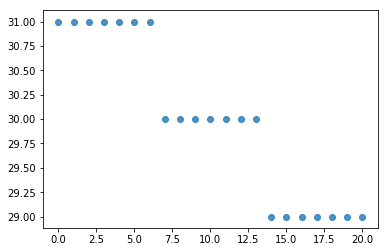

In [4]:
da.plot_responses_per_assignment_question(df1_en)

### 1.3 What is Standard Deviation and Mean Score per Assignment/Question Pair?

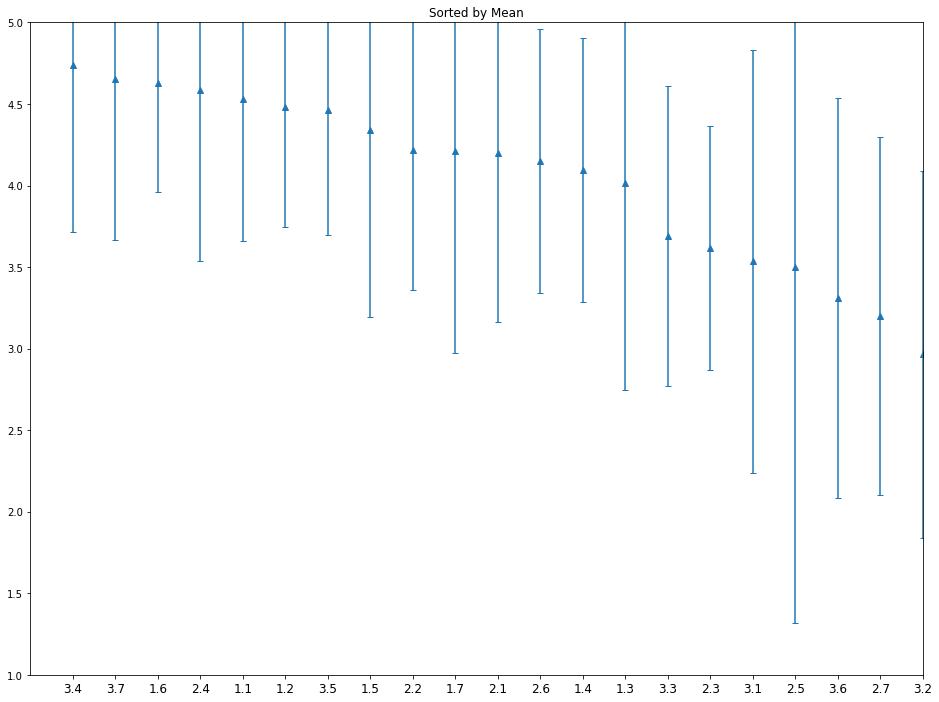

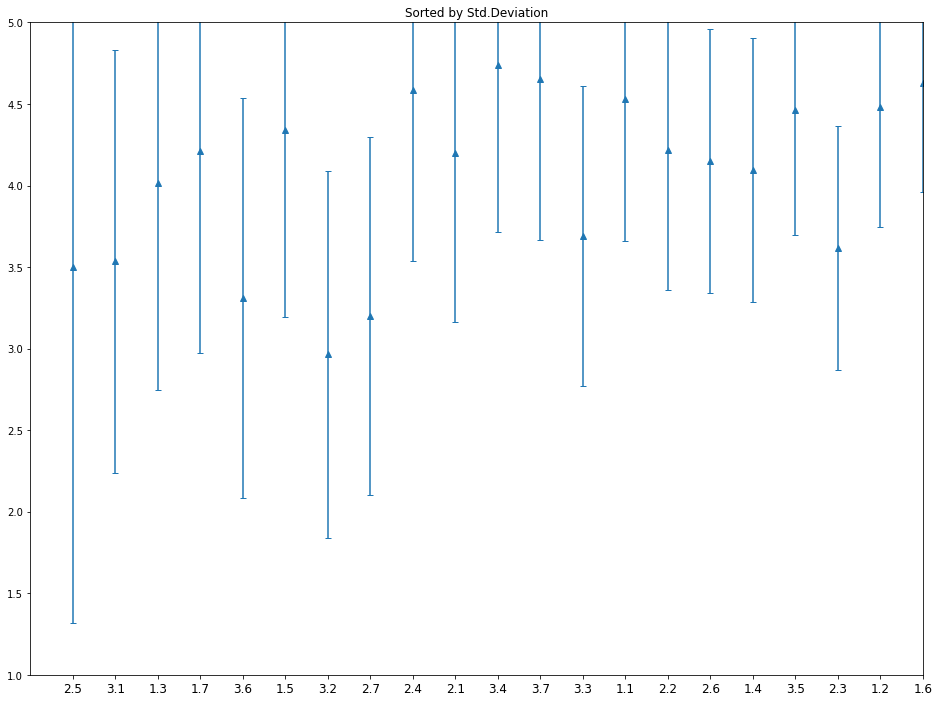

In [5]:
reload(da)
da.print_assignment_and_question_mean_and_std_for_scores(df1_en, ylim=[1,5])

### 1.4 What are the big five (min,25%,median,75%,max) of each Assignment and Question set?

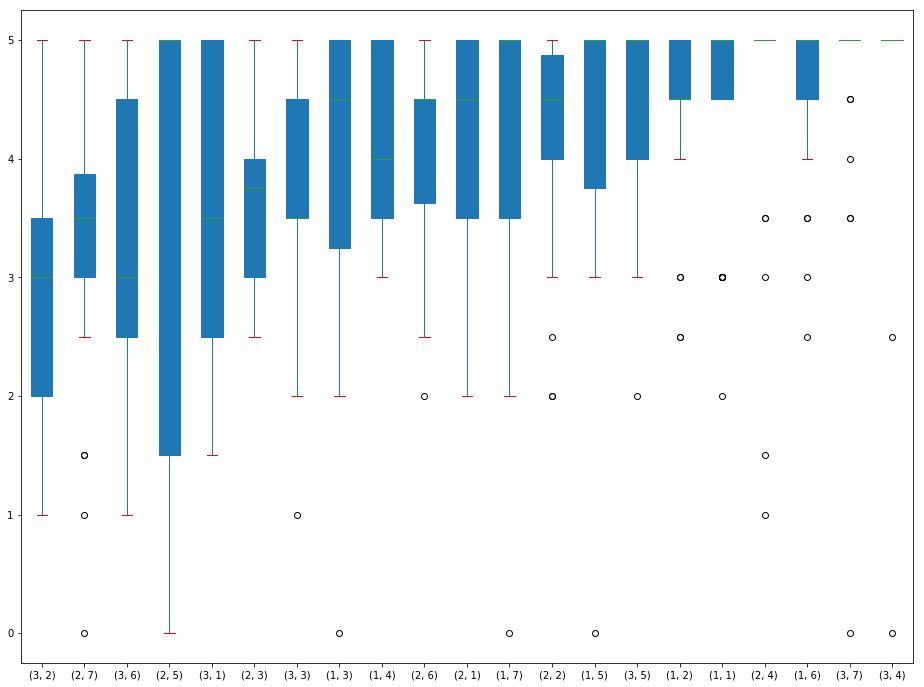

In [6]:
reload(da)
da.plot_assignment_and_question_boxplot(df1_en)

## 1.4.0 Notes

### Why is there a lot of Deviation in the scores for the top 3 STD.DEV Questions?
1. 2.5: [How many constructors] One-Word Answer: Unlimited.
  - possible fix: Use Fill-In-The-Blank question types.
2. 3.1: [Role of prototyping] Complicated Multi-Sentence Answers.
  - possible fix: Provide more than 1 Model Answer.
3. 1.3: [How does compiler handle inline functions]: Many possible "correct" answers but only one model.
  - possible fix: Provide more than 1 Model Answer.


In [20]:
#df1_en[np.logical_and(df1_en['AID'] == 1, df1_en['QID'] == 3)]['Model Answer'].tolist(df)


array(['What does a function signature include?',
       'What is the scope of global variables?',
       'How does the compiler handle inline functions?',
       'What is the main advantage associated with function arguments that are passed by reference?',
       'How are overloaded functions differentiated by the compiler?',
       'When defining a recursive function, what are possible causes for infinite recursion?',
       'What are the similarities between iteration and recursion?',
       'What is typically included in a class definition?',
       'What is the difference between a data member and a local variable inside a member function?',
       'What is the difference between a constructor and a function?',
       'When does C++ create a default constructor?',
       'How many constructors can be created for a class?',
       'What is the difference between a function prototype and a function definition?',
       'What is the role of a header-file?',
       'What is the role o

### 1.5 What do the Histograms of the Scores look like?

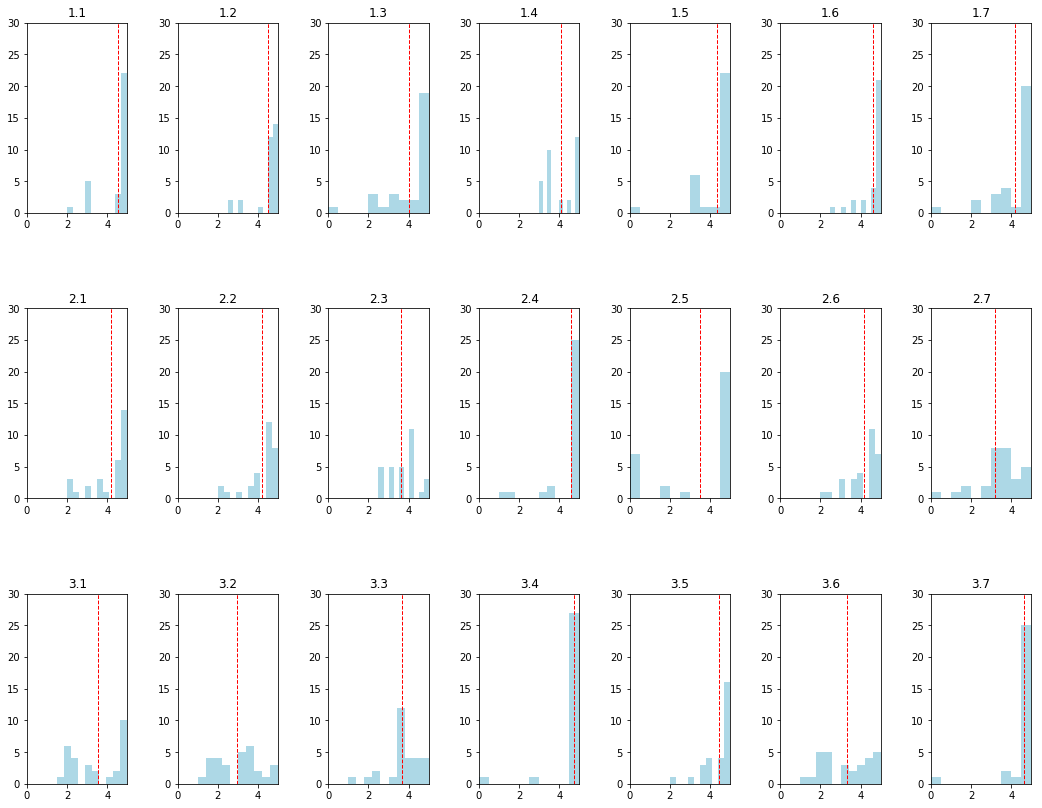

In [66]:
da.plot_assignment_and_question_histograms(df1_en)

### 1.6 What are statistics for the scores obtained from randomly assigning grades?

In [34]:
import libs.stats as stats
reload(utils)

n = len(df1_en['Score'])
k4 = utils.convert_to_class4(df1_en['Score'])
k4r = np.random.choice(np.unique(k4), size=n, replace=True)
print('4-Class Random')
stats.print_big4(k4, k4r)
stats.print_stats(k4, k4r)
print()

k3 = utils.convert_to_class3(df1_en['Score'])
k3r = np.random.choice(np.unique(k3), size=n, replace=True)
print('3-Class Random')
stats.print_big4(k3, k3r)
stats.print_stats(k3, k3r)
print()

print('2-Class Random')
k2 = utils.convert_to_class2(df1_en['Score'])
k2r = np.random.choice(np.unique(k2), size=n, replace=True)
stats.print_big4(k2, k2r)
stats.print_stats(k2, k2r)
print()

4-Class Random
Accuracy: 23.016%
Precision: 32.094%
Recall: 23.016%
F1-Measure: 25.229%
Pearson's R: -0.04
Cohen's Kappa: -0.02
RMSE: 1.63
MAE: 1.31
Y-True Mean: 2.13
Y-Pred Mean: 1.46
Y-True Std Deviation: 0.97
Y-Pred Std Deviation: 1.10

3-Class Random
Accuracy: 32.698%
Precision: 47.932%
Recall: 32.698%
F1-Measure: 36.092%
Pearson's R: -0.03
Cohen's Kappa: -0.01
RMSE: 1.23
MAE: 0.95
Y-True Mean: 1.52
Y-Pred Mean: 1.00
Y-True Std Deviation: 0.73
Y-Pred Std Deviation: 0.82

2-Class Random
Accuracy: 47.619%
Precision: 73.694%
Recall: 47.619%
F1-Measure: 55.424%
Pearson's R: -0.07
Cohen's Kappa: -0.05
RMSE: 0.72
MAE: 0.52
Y-True Mean: 0.86
Y-Pred Mean: 0.50
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.50



### 1.7 What are the stats if we randomly assigned grades based on the underlying distribution?

In [36]:

print('4-Class Random')
k4_probs = [(k4[k4 == x].count() / n) for x in range(4)]
k4r2 = np.random.choice([0,1,2,3], size=n, replace=True, p=k4_probs)
stats.print_big4(k4, k4r2)
stats.print_stats(k4, k4r2)
print()

print('3-Class Random')
k3_probs = [(k3[k3 == x].count() / n) for x in range(3)]
k3r2 = np.random.choice(np.unique(k3), size=n, replace=True, p=k3_probs)
stats.print_big4(k3, k3r2)
stats.print_stats(k3, k3r2)
print()

print('2-Class Random')
k2_probs = [(k2[k2 == x].count() / n) for x in range(2)]
k2r2 = np.random.choice(np.unique(k2), size=n, replace=True, p=k2_probs)
stats.print_big4(k2, k2r2)
stats.print_stats(k2, k2r2)
print()

4-Class Random
Accuracy: 30.159%
Precision: 30.692%
Recall: 30.159%
F1-Measure: 30.412%
Pearson's R: -0.11
Cohen's Kappa: -0.04
RMSE: 1.46
MAE: 1.11
Y-True Mean: 2.13
Y-Pred Mean: 2.10
Y-True Std Deviation: 0.97
Y-Pred Std Deviation: 0.99

3-Class Random
Accuracy: 48.571%
Precision: 48.910%
Recall: 48.571%
F1-Measure: 48.722%
Pearson's R: -0.00
Cohen's Kappa: -0.01
RMSE: 1.02
MAE: 0.69
Y-True Mean: 1.52
Y-Pred Mean: 1.52
Y-True Std Deviation: 0.73
Y-Pred Std Deviation: 0.71

2-Class Random
Accuracy: 75.714%
Precision: 76.498%
Recall: 75.714%
F1-Measure: 76.100%
Pearson's R: 0.02
Cohen's Kappa: 0.02
RMSE: 0.49
MAE: 0.24
Y-True Mean: 0.86
Y-Pred Mean: 0.85
Y-True Std Deviation: 0.35
Y-Pred Std Deviation: 0.36

